# Q-Learning - Frozen Lake

In [232]:
import numpy as np
import gym
import random
import time
from IPython.display import clear_output
from matplotlib import pyplot as plot
import numpy as np

Create game environment for frozen lake.

In [233]:
env = gym.make("FrozenLake-v1", map_name="4x4",is_slippery=True)

Render the environment:

In [234]:
#env.reset()
env.render()


SFFF
FHFH
FFFH
HFFG


Get states and actions for the lake.

In [235]:
action_space_size = env.action_space.n
state_space_size = env.observation_space.n

print(action_space_size,state_space_size)

4 16


Move the agent: 

In [236]:
state = env.reset()
action = env.action_space.sample()
new_state, reward, done, info = env.step(action)
clear_output(wait=True)
print(env.render())
print(reward)
print(new_state)

  (Down)
SFFF
FHFH
FFFH
HFFG
None
0.0
4


# Complete the code

Initialize some parameters.

In [237]:
num_episodes = 15000
max_steps_per_episode = 200

learning_rate = 0.2
discount_rate = 0.95

rewards_avg = []

q_table = np.zeros((64,4))
#print(q_table)
print(q_table[0,0])
print(np.e)

0.0
2.718281828459045


Run Q-Learning algorithm:

In [238]:
# This cycle is to calculate the average reward/episodes and its only purpose is to plot the nice graph below that
# shows how the agent learn how to maximize the reward.
for it in range(10):
    print('average ', it)
    rewards_all_episodes=[]
    # exporation-exploitation trade-off params
    exploration_rate = 1
    max_exploration_rate = 1
    min_exploration_rate = 0.01
    exploration_decay_rate = 0.005
    q_table = np.zeros((64,4))

    # iterate over the episodes
    for episode in range(num_episodes):
        state = env.reset()
        #print(state)
        done = False
        rewards_current_episode = 0
        
        # iterate over the steps for an episode
        for step in range(max_steps_per_episode):
            # Exploration-exploitation trade-off
            exploration_rate_threshold = 0.3
            if exploration_rate_threshold <= exploration_rate:
                action = env.action_space.sample()
            else:
                action = np.argmax(q_table[state])

            # Take action
            new_state, reward, done, info = env.step(action)

            # Update Q-table for Q(s,a)
            q_table[state, action] = ((1 - learning_rate)*q_table[state, action]) + learning_rate*(reward + (discount_rate * np.max(q_table[new_state])))
            
            # transition next state
            state = new_state
            rewards_current_episode += reward

            if done == True: 
                break

        # Exploration rate decay
        exploration_rate = min_exploration_rate + (max_exploration_rate - min_exploration_rate) * np.power(np.e, (-exploration_decay_rate * episode))

        rewards_all_episodes.append(rewards_current_episode)
    rewards_avg.append(rewards_all_episodes)

average  0
average  1
average  2
average  3
average  4
average  5
average  6
average  7
average  8
average  9


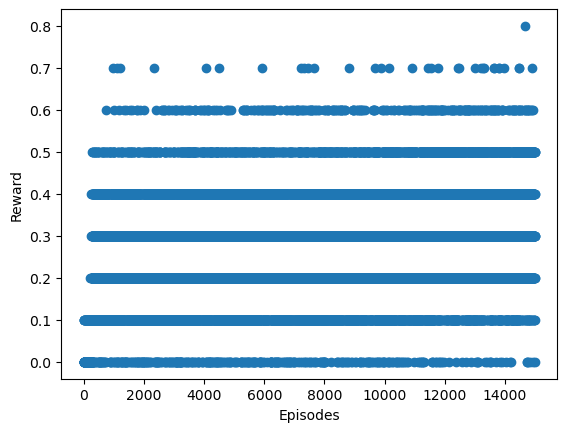

In [239]:

x = [i for i in range(0,num_episodes)]
y = np.mean(rewards_avg, axis=0)
plot.xlabel('Episodes')
plot.ylabel('Reward')
plot.plot(x, y,'o')


In [240]:
# Print updated Q-table
print("\n\n********Q-table********\n")
print(q_table)



********Q-table********

[[4.23156088e-02 4.75279026e-05 4.73026373e-05 4.34188814e-05]
 [1.01923215e-05 2.69019639e-07 2.69019639e-07 6.74106049e-02]
 [0.00000000e+00 7.97508990e-02 1.83854699e-07 2.69019639e-07]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 7.05389701e-02]
 [4.71499732e-02 1.01028999e-04 1.48693263e-04 1.99407030e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.84191383e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.58035580e-04 0.00000000e+00 9.37460820e-04 5.96578847e-02]
 [5.38682137e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.03732467e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.29960000e-02 7.22000000e-03 2.19262894e-01 3.04000000e-02]
 [3.80000000e-02 7.22000000e-03 3.58849132e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e

watch it play!

In [241]:
for episode in range(10):
    state = env.reset()
    done = False
    print("*****EPISODE ", episode+1, "*****\n\n\n\n")
    time.sleep(1)
    
    for step in range(max_steps_per_episode):        
        clear_output(wait=True)
        env.render()
        time.sleep(0.3)
        
        action = np.argmax(q_table[state,:])        
        new_state, reward, done, info = env.step(action)
        
        if done:
            clear_output(wait=True)
            env.render()
            if reward == 1:
                print("****You reached the goal!****")
                time.sleep(3)
            else:
                print("****You fell through a hole!****")
                time.sleep(3)
                clear_output(wait=True)
            break
            
        state = new_state
        env.close()

  (Right)
SFFF
FHFH
FFFH
HFFG
****You reached the goal!****


# Answer these questions

Answer the following questions running the necessary experiments if necessary:
- What the env.step(action) does? 
Permite moverse de un estado a otro a traves de acciones validas. Para el caso de este ejemplo tenemos un tablero en el cual desde cada estado podemos movernos con las siguientes acciones: Arriba, Abajo, Izquierda y Derecha
- How is the agent rewarded? why?
El agente es recompenzado a traves de un numero. En este caso nuestro agente es recompenzado cuando llega a la meta con un +1, cuando cae en una casilla con hielo recibe 0 y cuando cae en un hueco recibe igualmente un 0.
- What is the q_table matrix for? 
La q_table matrix es usada para calcular probabilidades para cada estado, estas probabilidades expresan que tan buena es una determinada accion dependiendo de el objetivo del problema, en este caso nuestro objetivo es el de maximizar el reward obtenido, esto lo obtenemos el llegar a la meta sin caernos por los huecos. Una vez calculados las probabilidades de la q_table es posible desplazarse por entre estados de forma que lleguemos a nuestro objetivo.
- What is an optimal policy for this specific place? (needs experiments)
Una optimal policy es una q_table matrix que ha sido llenada con las mejores probabilidades.
- What happen if we modify the exploration_decay_rate parameter? what does it do? (needs experiments)
Dependiendo de como se modifique, haremos exploracion por mas o menos tiempo.
- What is the discount_rate and learning_rate for? what happen if we modify those? (needs experiments)
El discount_rate es un parametro que determina si nuestro agente se consentrara mas en rewards inmediatos o en rewards futuros. El learning rate es un parametro que mide que tan rapido el agente abandona el valor previo del q_table para un estado y accion especificos
- What happen if we remove the first cycle in the code: for it in range(100)? what is their purpose? 
Su proposito es el de calcular el reward medio por episodio de forma que podamos graficarlo.
- What is the is_slippery property does? What if we remove the slippery property (is_slippery=False) in the environment? Do we still need RL to solve this problem? why?
Es una propiedad que hace que al realizar una determinada accion, nuestro agente termine en otra casilla diferente con cierta probabilidad.
- Can you explain in your own words what the last block of code does?
El ultimo bloque de codigo lo que hace es usando las probabilidades obtenidas en la q_table matrix mueve el agente usando la probabilidad mas alta obtenida con el proposito de visualizar como el agente se moveria siguiendo las probabilidades dadas en la q_table matrix

# Answer these questions

Answer the following questions running the necessary experiments if necessary:
- What the env.step(action) does? 

A.- It allows to move from one state to another through valid actions. For the case of this example we have a board in which from each state we can move with the following actions: Up, Down, Left and Right.
- How is the agent rewarded? why?

A.- The agent is rewarded through a number. In this case our agent is rewarded when he reaches the goal with a +1, when he falls on an icy square he receives 0 and when he falls in a hole he receives 0.
- What is the q_table matrix for? 

A.- The q_table matrix is used to calculate probabilities for each state, these probabilities express how good is a certain action depending on the objective of the problem, in this case our objective is to maximize the reward obtained, this is obtained by reaching the goal without falling through the holes. Once calculated the probabilities of the q_table it is possible to move between states so that we reach our goal.
- What is an optimal policy for this specific place (needs experiments)?

A.- An optimal policy is a q_table matrix that has been filled with the best probabilities.
- What happen if we modify the exploration_decay_rate parameter? what does it do? (needs experiments)

A.- Depending on how we modify it, we will do exploration for more or less time.
- What is the discount_rate and learning_rate for? what happen if we modify those? (needs experiments)

A.- The discount_rate is a parameter that determines whether our agent will focus more on immediate rewards or on future rewards. The learning rate is a parameter that measures how fast the agent leaves the previous value of the q_table for a specific state and action.
- What happen if we remove the first cycle in the code: for it in range(100)? what is their purpose? 

A.-Its purpose is to calculate the average reward per episode so that we can plot it.
- What is the is_slippery property does? What if we remove the slippery property (is_slippery=False) in the environment? Do we still need RL to solve this problem? why?

A.-It is a property that makes that when performing a certain action, our agent ends up in a different box with a certain probability.
- Can you explain in your own words what the last block of code does?

A.-The last block of code what it does is using the probabilities obtained in the q_table matrix it moves the agent using the highest probability obtained with the purpose of visualizing how the agent would move following the probabilities given in the q_table matrix.
